In [42]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import plotly as plt
from matplotlib.lines import *
from matplotlib.patches import *
from matplotlib.text import *
from matplotlib.image import *
import seaborn as sns
import squarify
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objs as go 
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [ ]:
#Dirty Dataset - Part 1

In [3]:
df = pd.read_csv("Data_Analyst_Sample.csv")

In [ ]:
# Display the first 5 rows of the dataframe
print(df.head())

In [ ]:
# Display the last 5 rows of the dataframe
print(df.tail())

In [ ]:
# Display some basic statistical information about the dataframe
print(df.describe())

In [ ]:
df.shape

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

In [21]:
df = df.dropna(subset=df.select_dtypes(include=['object']).columns, how='any')

In [24]:
df.update(df[df.select_dtypes(include=['int', 'float']).columns].fillna(0))

In [ ]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    df[col].fillna(0, inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
df.notnull().all()

In [ ]:
#Dirty Dataset - part 2

In [8]:

# read the errors.csv file into a dataframe
errors_df = pd.read_csv("errors.csv")

In [2]:
# read the Data_Analyst_Sample.csv file into a dataframe
data_df = pd.read_csv("Data_Analyst_Sample.csv")

In [ ]:
# count the number of errors in the dataset
error_count = 0
data_df["Campaign Name"] = data_df["Campaign Name"].astype(str)
for i, row in errors_df.iterrows():
    if data_df["Campaign Name"].str.contains(row["Campaign error name"]).any():
        error_count += 1
        # use the .replace() method to correct the errors
        data_df["Campaign Name"].replace(row["Campaign error name"], row["Campaign correct"], inplace=True)

print("Number of errors found:", error_count)

In [ ]:
# verify the errors have been corrected
print("Errors corrected:", error_count)

In [118]:
# export the corrected "Campaign Name" column to a .csv file
data_df[["Campaign Name"]].to_csv("corrected_campaign_names.csv", index=False)

In [27]:
#Core Learning 3 - Exploratory Data Analysis (EDA)

In [44]:
# Reading the csv file and storing it in a variable named 'data'
data = pd.read_csv('./Superstore_data_sample.csv')

In [ ]:
# Exploration methods

In [ ]:
# Using the head() method to display the first 5 rows of the data
print(data.head())

In [ ]:
# Using the describe() method to display the statistical summary of the numerical columns
print(data.describe())

In [ ]:
# Using the info() method to display the information of the dataframe
print(data.info())

In [ ]:
# check the shape of the data (rows, columns)
print(data.shape)

In [ ]:
# check the columns with missing values
print(data.isnull().sum())

In [ ]:
# Data Cleaning

In [21]:
# Remove missing values from columns with object datatype
df = data.dropna(subset=data.select_dtypes(include=['object']).columns, how='any')

In [22]:
# Replace missing values with zero in columns with numeric datatype
df = df.fillna(0)

In [ ]:
# verify that there are no missing values
print(df.isnull().sum().sum()) # prints the total number of missing values in the dataframe

In [ ]:
#Core Learning 3 - Exploratory Data Analysis (EDA) - continued

In [79]:
"""
Question:
Which category (furniture, office supplies and technology) has the most products? 
and of each subcategory, how many products are there?
"""

In [ ]:
# Reading the csv file and storing it in a variable named 'data'
first_q = pd.read_csv('./Superstore_data_sample.csv')

In [ ]:
# group the 'Product Name' column by 'Category' and 'Sub-Category'
grouped_csc = first_q.groupby(['Category', 'Sub-Category'])['Product Name'].count()

# print the result
print(grouped_csc)

In [ ]:
# group the 'Product Name' column by 'Category' against and find the total number of products per category
grouped_c = first_q.groupby(['Category'])['Product Name'].size()

# print the result
print(grouped_c)

In [ ]:
# group the 'Product Name' column by 'Sub-Category' and find the total number of products per subcategory
grouped_sc = first_q.groupby(['Sub-Category'])['Product Name'].count()

# print the result
print(grouped_sc)

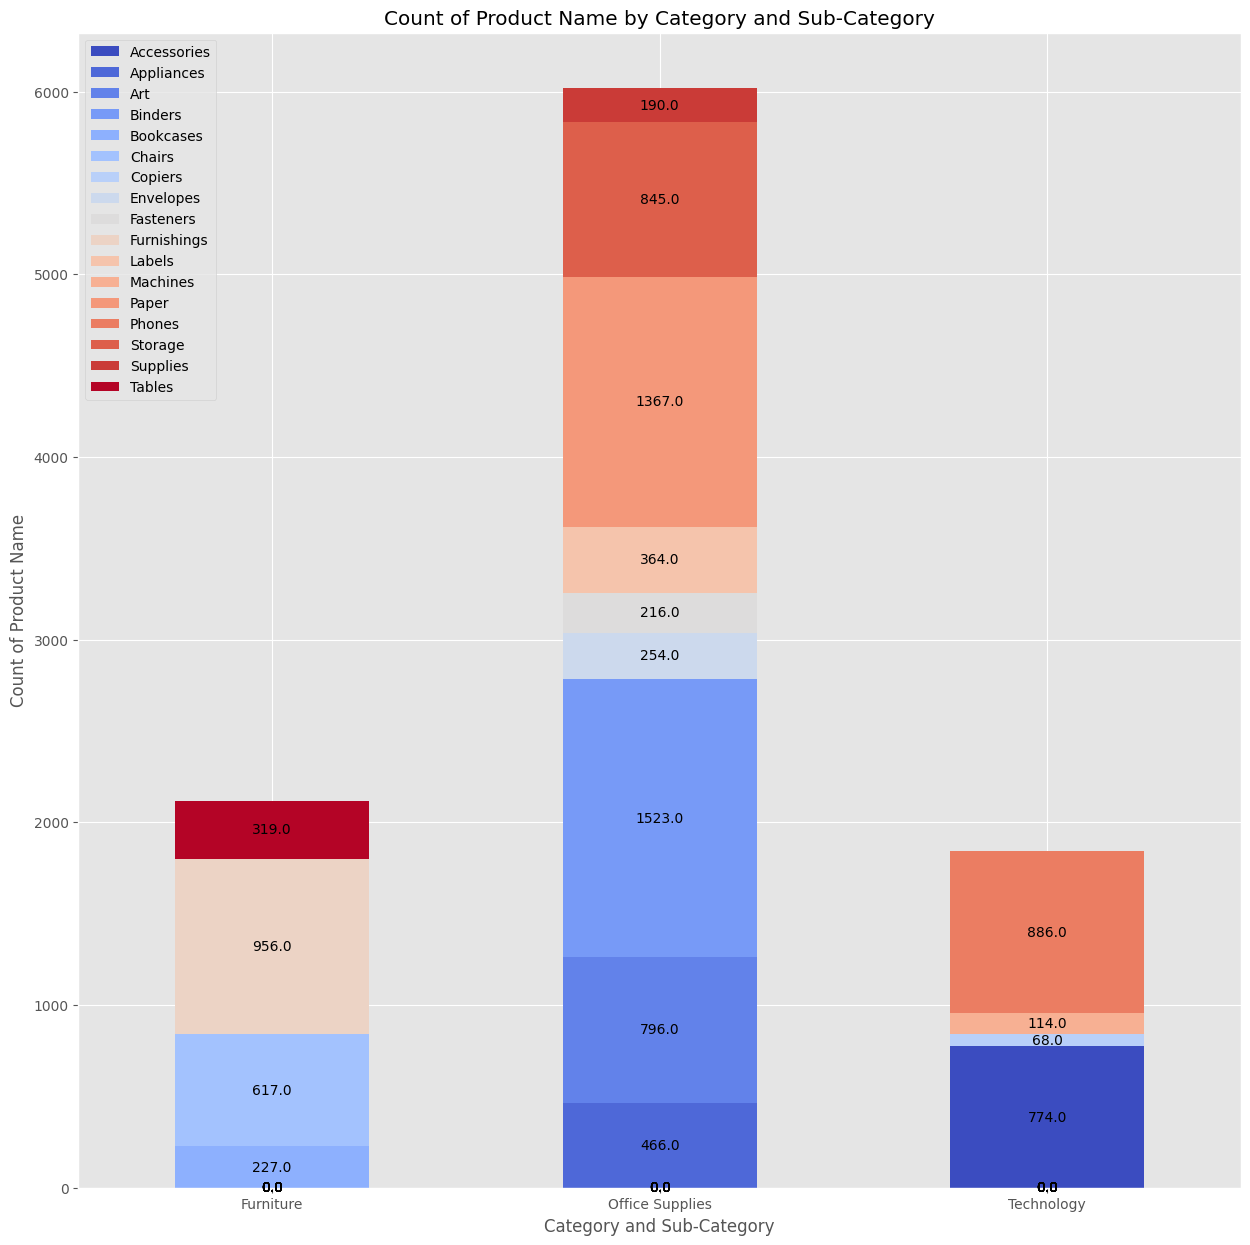

In [111]:
# Create a stacked bar chart
grouped_csc.unstack().plot(kind='bar', stacked=True, figsize=(15, 15), colormap='coolwarm')

# Find the axis of the graph
ax = plt.gca()

#selects the position of the bar on the x axis
for i in ax.containers:
    #for each stack on the x axis
    for j in i:
        #get the x and y center position of each stack and plot the values in that position
        ax.text(j.get_x() + j.get_width()/2., j.get_y() + j.get_height()/2., str(j.get_height()), 
                ha='center', va='center', rotation=0)

# Rotate x-axis labels
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Category and Sub-Category')
plt.ylabel('Count of Product Name')
plt.title('Count of Product Name by Category and Sub-Category')

# change location of the legend
plt.legend(loc='upper left')

# draw the stacked bar chart
plt.show()

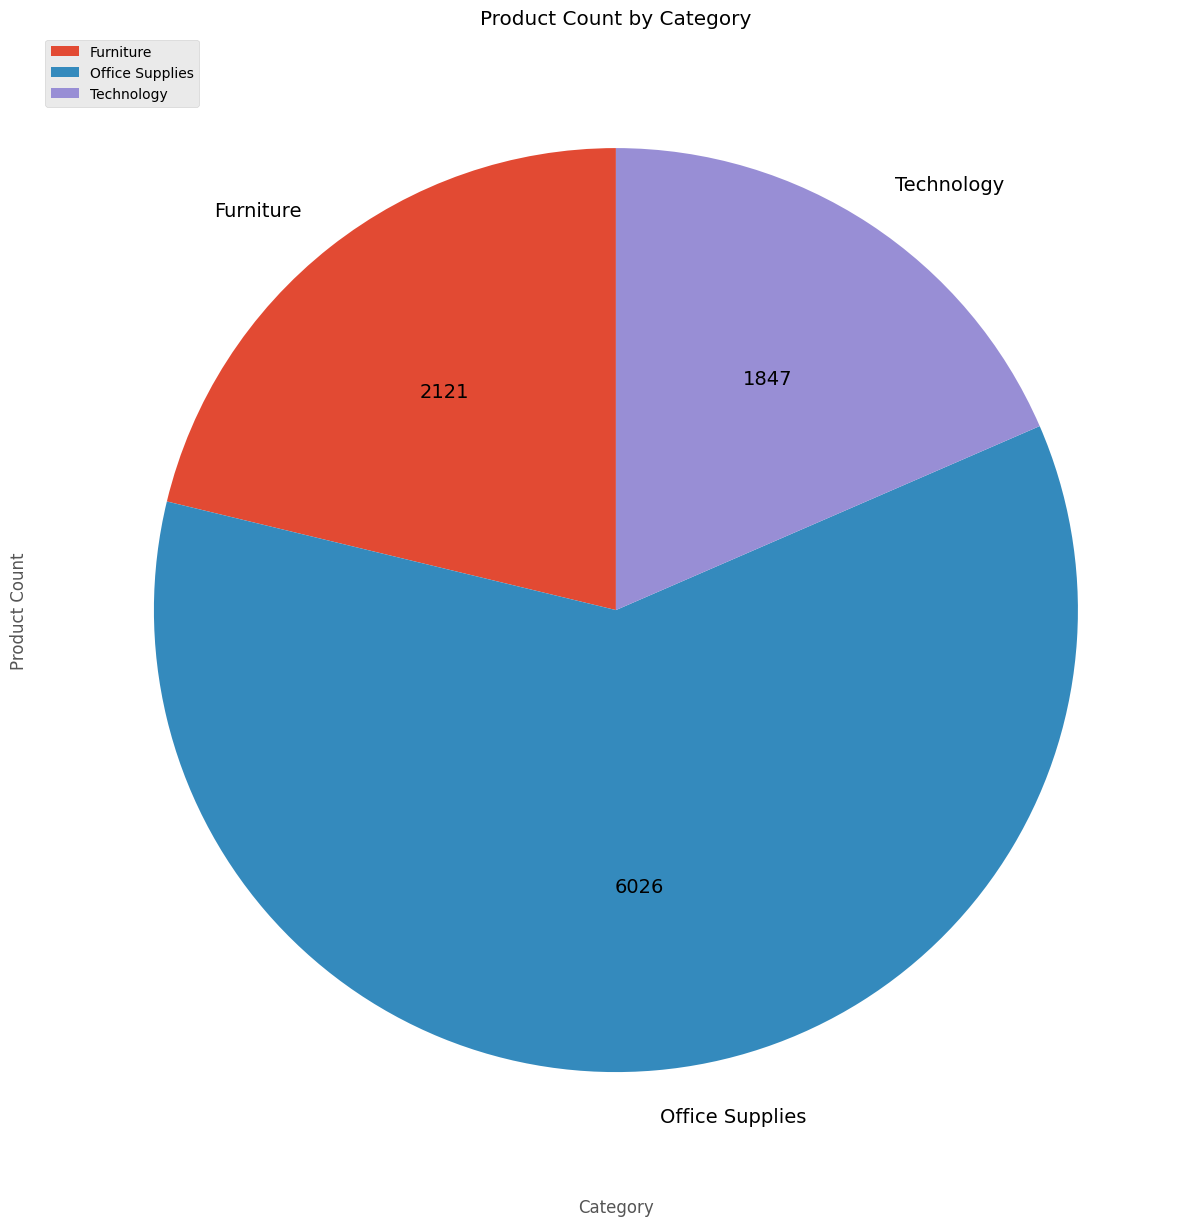

In [114]:
# create a pie chart of the product count by category
grouped_c.plot(kind='pie', labels=grouped_c.index, 
                   autopct=lambda p : '{:.0f}'.format(p * sum(grouped_c) / 100),
                   startangle=90, shadow=False, legend = False, fontsize=14, figsize=(15, 15))

# change location of the legend
plt.legend(loc='upper left')

# add a title and labels
plt.title("Product Count by Category")
plt.xlabel("Category")
plt.ylabel("Product Count")

# show the chart
plt.show()


In [ ]:
"""
Answer:

1. The category with the most products sold,
a. "Office Supplies" with 6026 products,
b. "Technology" with 1847 products, 
c. "Furniture" with 2121 products.

2. Within the "Office Supplies" category, 
a. the sub-category with the most products sold is "Binders" with 1523 products,
b. followed by "Paper" with 1367 products, 
c. and "Storage" with 845 products. 

3. Within the "Technology" category,
a. the sub-category with the most products is "Phones" with 886 products,
b. followed by "Accessories" with 774 products, 
c. and "Machines" with 114 products. 

4. Within the "Furniture" category, 
a. the sub-category with the most products is "Furnishings" with 956 products,
b. followed by "Chairs" with 617 products,
c. and "Bookcases" with 227 products.
""" 

In [ ]:
"""
Question:
What is the difference in sales and profits between the different product categories (Technology, Furniture, Office Supplies)
in the Superstore_data_sample.csv dataset and which category generates the most sales and profits?
"""

In [61]:
# import the data file
second_q = pd.read_csv('./Superstore_data_sample.csv')

In [62]:
# check data types
print(second_q.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [63]:
# check for missing values
print(second_q.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name    13
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name     12
Sales             5
Quantity          0
Discount          0
Profit            0
dtype: int64


In [64]:
# drop duplicate values
second_q = second_q.drop_duplicates()

In [65]:
# check for missing values
print(second_q.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name    13
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name     12
Sales             5
Quantity          0
Discount          0
Profit            0
dtype: int64


In [66]:
# drop unnecessary columns
second_q = second_q.drop(['Row ID','Order ID','Customer ID','Product ID'], axis=1)

In [67]:
# standardize date columns
second_q['Order Date'] = pd.to_datetime(second_q['Order Date'], format='%d/%m/%Y')
second_q['Ship Date'] = pd.to_datetime(second_q['Ship Date'], format='%d/%m/%Y')

In [68]:
# remove outliers
second_q = second_q[second_q['Profit'] > 0]

In [69]:
# group data by category
category_group = second_q.groupby(by='Category').sum()

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_25604\4102288951.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_group = second_q.groupby(by='Category').sum()


In [70]:
# create a new column that contains the values of sales and profit as a tuple
second_q['Sales_Profit'] = list(zip(second_q.Sales, second_q.Profit))

In [71]:
# reshape the dataframe in long format
second_q = pd.melt(second_q, id_vars=['Category'], value_vars=['Sales', 'Profit'], var_name='sales_profit', value_name='value')

In [72]:
print(second_q)

              Category sales_profit     value
0            Furniture        Sales  261.9600
1            Furniture        Sales  731.9400
2      Office Supplies        Sales   14.6200
3      Office Supplies        Sales   22.3680
4            Furniture        Sales   48.8600
...                ...          ...       ...
16111        Furniture       Profit    4.1028
16112        Furniture       Profit   15.6332
16113       Technology       Profit   19.3932
16114  Office Supplies       Profit   13.3200
16115  Office Supplies       Profit   72.9480

[16116 rows x 3 columns]


In [73]:
grouped_second_q = second_q.groupby(["Category", "sales_profit"]).sum().reset_index()
print(grouped_second_q)

          Category sales_profit        value
0        Furniture       Profit   79387.3818
1        Furniture        Sales  465116.9615
2  Office Supplies       Profit  179106.0593
3  Office Supplies        Sales  618910.3490
4       Technology       Profit  184034.8663
5       Technology        Sales  716680.3480


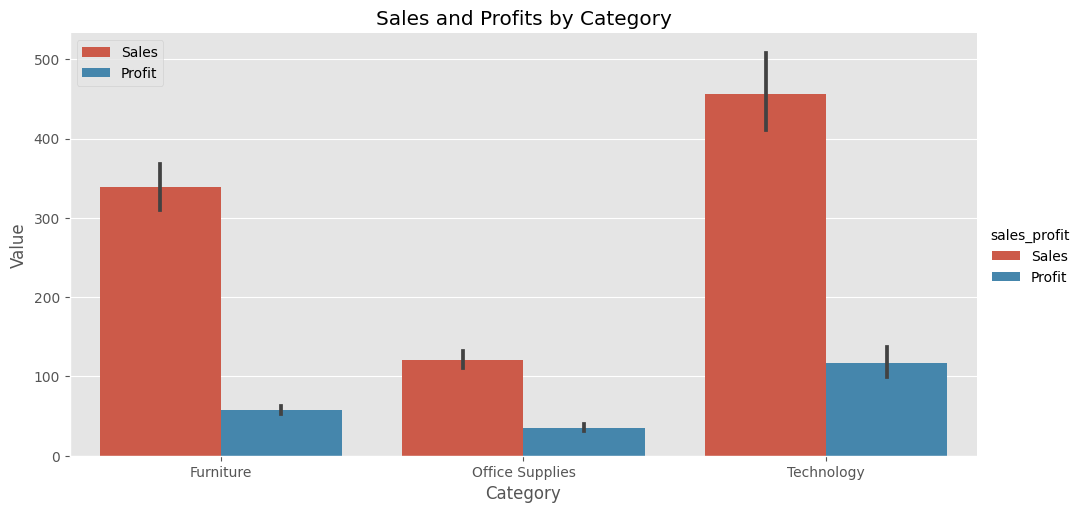

In [119]:
# create a catplot
q = sns.catplot(x='Category', y='value', hue='sales_profit', kind='bar', data=second_q, height=5, aspect=2, )

# add title and labels
plt.title("Sales and Profits by Category")
plt.xlabel("Category")
plt.ylabel("Value")

# add y values on each bar and round it to the nearest .0
for i in g.ax.containers:
    for j in i:
        g.ax.text(j.get_x() + j.get_width()/2., j.get_height()/2-10, round(j.get_height(),1), ha='center', va='bottom')

# show the plot
plt.show()

In [ ]:
"""
From the final table, it can be seen that: 

1. Furniture has the highest sales with 465116.9615 and the highest profit with 79387.3818. 
2. Office Supplies has the second highest sales with 618910.3490 and the second highest profit with 179106.0593. 
3. Technology has the lowest sales with 716680.3480 and the lowest profit with 184034.8663. 

To summarize, Furniture generates the most sales and profits among all categories, while Technology generates the least.
"""

In [ ]:
"""
Is it true that the Consumer segment in the Southern region of the United States generates the majority of the sales
for the company, as compared to other segments and regions?
"""

In [221]:
# import the csv file
third_q = pd.read_csv('./Superstore_data_sample.csv')

In [222]:
# group the data by Segment and Region columns
grouped = third_q.groupby(['Segment', 'Region'])[['Sales', 'Profit']].sum()

In [223]:
# display the grouped data
print(grouped)

                           Sales      Profit
Segment     Region                          
Consumer    Central  252031.4340   8564.0481
            East     350908.1670  41190.9843
            South    195580.9710  26913.5728
            West     362880.7730  57450.6040
Corporate   Central  157975.0128  18703.9020
            East     200409.3470  23622.5789
            South    121869.1925  15215.2232
            West     225718.2945  34437.4299
Home Office Central   91212.6440  12438.4124
            East     127460.4460  26709.2168
            South     74255.0015   4620.6343
            West     136721.7770  16530.4150


In [224]:
# reset the index to be able to plot the data
grouped.reset_index(inplace=True)

In [227]:
# display the grouped data
print(grouped)

        Segment   Region        Sales      Profit       Region Segment
0      Consumer  Central  252031.4340   8564.0481     Central Consumer
1      Consumer     East  350908.1670  41190.9843        East Consumer
2      Consumer    South  195580.9710  26913.5728       South Consumer
3      Consumer     West  362880.7730  57450.6040        West Consumer
4     Corporate  Central  157975.0128  18703.9020    Central Corporate
5     Corporate     East  200409.3470  23622.5789       East Corporate
6     Corporate    South  121869.1925  15215.2232      South Corporate
7     Corporate     West  225718.2945  34437.4299       West Corporate
8   Home Office  Central   91212.6440  12438.4124  Central Home Office
9   Home Office     East  127460.4460  26709.2168     East Home Office
10  Home Office    South   74255.0015   4620.6343    South Home Office
11  Home Office     West  136721.7770  16530.4150     West Home Office


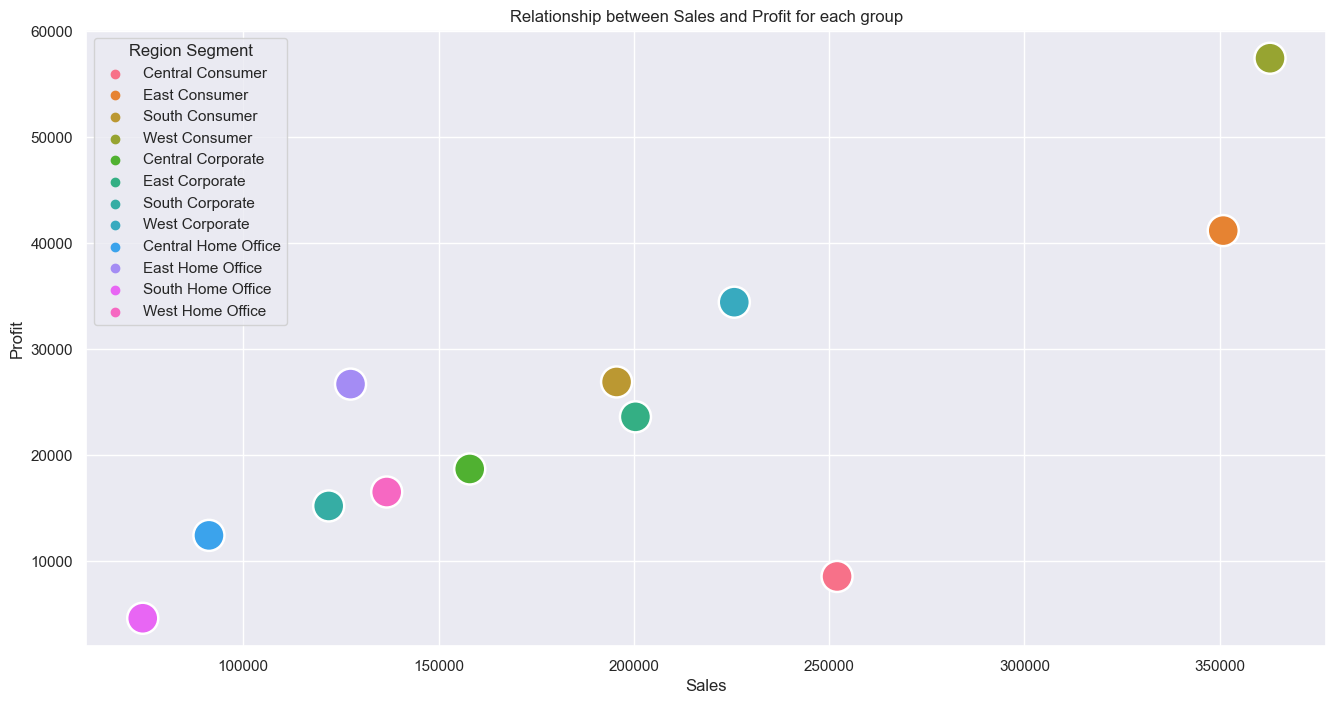

In [229]:
grouped['Region Segment'] = grouped['Region'] + ' ' + grouped['Segment']
palette = sns.color_palette("husl", n_colors=len(grouped['Region Segment'].unique()))

# create a scatter plot
sns.set(rc={'figure.figsize':(16,8)})

# Add different marker styles for each region
marker_style = ['o']

sns.scatterplot(x='Sales', y='Profit', data=grouped, hue='Region Segment', palette=palette, s=500)

# add title and labels
plt.title("Relationship between Sales and Profit for each group")
plt.xlabel("Sales")
plt.ylabel("Profit")

# modify the labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Region Segment')

# show plot
plt.show()
